In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[0], alpha=0.5,
               linestyles=['-'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

X = np.random.uniform(-3, 3, (100, 2))
y = np.sign(X[:, 1]**2 - X[:, 0]**3 + 2*X[:, 0] - 1)



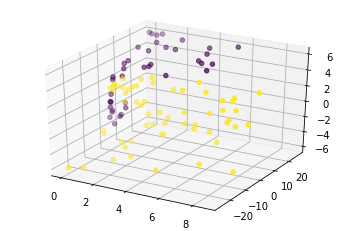

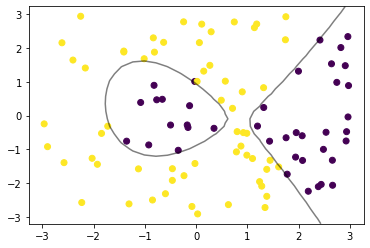

In [2]:
# def f(x1, x2):
#     return x2**2 - x1**3 + 2*x1 - 1

# xx1 = np.linspace(-3, 3, 100)
# xx2 = xx1
# Z = np.zeros((100, 100))

# for i in range(0, 100):
#     for j in range(0, 100):
#         Z[i, j] = f(xx1[i], xx2[j])

# plt.figure()
# plt.scatter(X[:, 1], X[:, 0], c=y)
# plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# plt.colorbar()
# plt.show()

Z = np.zeros((100, 3))
Z[:, 0] = X[:, 1]**2
Z[:, 1] = X[:, 0]**3
Z[:, 2] = 2*X[:, 0]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=y)
plt.show()

clf = svm.SVC(C=1e3, kernel='poly', degree=3, coef0=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plot_svc_decision_function(clf)

# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1)
plt.show()